In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('SongLyrics.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'Lyrics', 'Songs_link', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1'], axis=1, inplace = True)

In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,Lyrics,Songs_link
1,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/stopmessi...
3,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/streetjes...
5,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/sudonasun...
7,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/sunnyside...
9,\r\r\r\r\r\r\r\r\r\r\r\r\r\r\r\n\r\r\r\r\r\r\r...,http://azlyrics.com/lyrics/aerosmith/sunshine....


In [7]:
songs = pd.read_csv('Final_Song_List.csv')

In [8]:
songs.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Artist_list', 'Songs_list'], dtype='object')

In [9]:
songs.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [10]:
def full_link(link):
    return "http://azlyrics.com" + link[2:]

In [11]:
songs['Songs_link'] = songs['Songs_list'].apply(full_link)

In [12]:
songs.drop('Songs_list', axis=1, inplace=True)

In [13]:
songs.head()

,Artist_list,Songs_link
0,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/16ondeathrow.html
1,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/2ofamerikazmos...
2,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/2ofamerikazmos...
3,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/5deadlyvenomz....
4,https://www.azlyrics.com/19/2pac.html,http://azlyrics.com/lyrics/2pac/acrookedniggat...


In [14]:
final_df = pd.merge(df, songs, on="Songs_link")

In [15]:
def remove_extra_characters(string):
    string = string.replace("\r", "")
    string = string.replace("\n", " ")
    string = string.replace("\'", "")
    string = string.replace(".", "")
    return string

In [16]:
final_df['Lyrics'] = final_df['Lyrics'].apply(remove_extra_characters)

In [17]:
final_df['Occurences'] = final_df.groupby('Artist_list')['Lyrics'].transform('count')

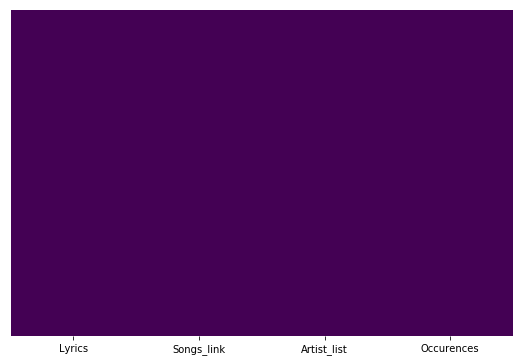

In [18]:
plt.figure(figsize=(9,6))
sns.heatmap(final_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Hence, there are no null values in the final dataframe.

In [19]:
final_df.drop_duplicates(['Songs_link'], keep='first', inplace=True)

In [20]:
final_df.describe()

,Occurences
count,23318.000000
mean,307.591303
std,173.129379
min,32.000000
25%,182.000000
50%,279.000000
75%,405.000000
max,783.000000


In [21]:
def number_of_words(string):
    array = string.split(" ")
    return len(array)

In [22]:
final_df['Length of lyrics'] = final_df['Lyrics'].apply(number_of_words)

In [23]:
final_df.describe()

,Occurences,Length of lyrics
count,23318.000000,23318.000000
mean,307.591303,276.972339
std,173.129379,174.140975
min,32.000000,4.000000
25%,182.000000,168.000000
50%,279.000000,233.000000
75%,405.000000,329.000000
max,783.000000,3717.000000


In [24]:
final_df.head()

,Lyrics,Songs_link,Artist_list,Occurences,Length of lyrics
0,"Baby, please stop messin round Youll be mess...",http://azlyrics.com/lyrics/aerosmith/stopmessi...,https://www.azlyrics.com/a/aerosmith.html,215,136
1,Hey have you heard the news? Somebody stole ...,http://azlyrics.com/lyrics/aerosmith/streetjes...,https://www.azlyrics.com/a/aerosmith.html,215,483
2,I was a city boy Cought up in a city way A n...,http://azlyrics.com/lyrics/aerosmith/sudonasun...,https://www.azlyrics.com/a/aerosmith.html,215,188
3,You hear them people talkin About the man ab...,http://azlyrics.com/lyrics/aerosmith/sunnyside...,https://www.azlyrics.com/a/aerosmith.html,215,304
4,i sold my soul for a one night stand I follo...,http://azlyrics.com/lyrics/aerosmith/sunshine....,https://www.azlyrics.com/a/aerosmith.html,215,220


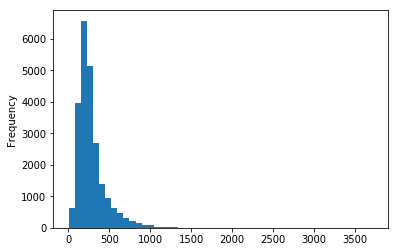

In [25]:
final_df['Length of lyrics'].plot(bins=50, kind='hist')

In [26]:
final_df[final_df['Length of lyrics'] == 3717]['Artist_list']

9530    https://www.azlyrics.com/e/eminem.html
Name: Artist_list, dtype: object

Hence, Emiem has the longest song in the given dataset.

# Text Pre-Processing

In [39]:
import string
from nltk.stem.lancaster import LancasterStemmer

In [40]:
lancaster_Stemmer = LancasterStemmer()

In [44]:
def text_process(lyrics):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in lyrics if char not in string.punctuation]
    stemmed = []
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    for token in nopunc.split():
        stemmed_token = lancaster_stemmer.stem(token)
        stemmed.append(stemmed_token)
    return stemmed

In [45]:
final_df['Tokens'] = final_df['Lyrics'].apply(text_process)

Hence, the messages have been tokenised. Tokenisation is the term used to describe the process of converting the string into a list of tokens (words that we actually want).
Then I used the Lancaster Stemmer. The Lancaster stemmer can reduce the inflected words to their root (or base) form.
Generally, two types of Stemmers are used: Porter Stemmer and the Lancaster Stemmer.
The Lancaster Stemmer is the new and the more advanced type of stemmer.

In [47]:
final_df

,Lyrics,Songs_link,Artist_list,Occurences,Length of lyrics,Tokens
0,"Baby, please stop messin round Youll be mess...",http://azlyrics.com/lyrics/aerosmith/stopmessi...,https://www.azlyrics.com/a/aerosmith.html,215,136,"[baby, pleas, stop, messin, round, youl, be, m..."
1,Hey have you heard the news? Somebody stole ...,http://azlyrics.com/lyrics/aerosmith/streetjes...,https://www.azlyrics.com/a/aerosmith.html,215,483,"[hey, hav, you, heard, the, new, somebody, sto..."
2,I was a city boy Cought up in a city way A n...,http://azlyrics.com/lyrics/aerosmith/sudonasun...,https://www.azlyrics.com/a/aerosmith.html,215,188,"[i, was, a, city, boy, cought, up, in, a, city..."
3,You hear them people talkin About the man ab...,http://azlyrics.com/lyrics/aerosmith/sunnyside...,https://www.azlyrics.com/a/aerosmith.html,215,304,"[you, hear, them, peopl, talkin, about, the, m..."
4,i sold my soul for a one night stand I follo...,http://azlyrics.com/lyrics/aerosmith/sunshine....,https://www.azlyrics.com/a/aerosmith.html,215,220,"[i, sold, my, soul, for, a, on, night, stand, ..."
5,Sweet emotion [2x] Talk about things and no...,http://azlyrics.com/lyrics/aerosmith/sweetemot...,https://www.azlyrics.com/a/aerosmith.html,215,163,"[sweet, emot, 2x, talk, about, thing, and, nob..."
6,God I love the sweet taste of India Lingers...,http://azlyrics.com/lyrics/aerosmith/tasteofin...,https://www.azlyrics.com/a/aerosmith.html,215,442,"[god, i, lov, the, sweet, tast, of, ind, ling,..."
7,I think its time to realize its done I guess...,http://azlyrics.com/lyrics/aerosmith/tellme.html,https://www.azlyrics.com/a/aerosmith.html,215,260,"[i, think, it, tim, to, real, it, don, i, gues..."
8,My baby give me a high temperature My baby g...,http://azlyrics.com/lyrics/aerosmith/temperatu...,https://www.azlyrics.com/a/aerosmith.html,215,147,"[my, baby, giv, me, a, high, temp, my, baby, g..."
9,Theres a cockroach in my coffee Theres a ne...,http://azlyrics.com/lyrics/aerosmith/thefarm.html,https://www.azlyrics.com/a/aerosmith.html,215,305,"[ther, a, cockroach, in, my, coff, ther, a, ne..."


Currently, we have the messages as lists of tokens and now we'll need to convert each of these into a vector that the ScikitLearn algorithm models can work with.

Now we'll convert each lyric, represented as a list of tokens above, into a vector that the machine learning model can understand.

Firstly, let's count the vocabulary of every every song and find if we can get any insights from it.

In [52]:
def vocabulary(token):
    return len(set(token))

In [53]:
final_df['Vocabulary'] = final_df['Tokens'].apply(vocabulary)

In [54]:
final_df

,Lyrics,Songs_link,Artist_list,Occurences,Length of lyrics,Tokens,Vocabulary
0,"Baby, please stop messin round Youll be mess...",http://azlyrics.com/lyrics/aerosmith/stopmessi...,https://www.azlyrics.com/a/aerosmith.html,215,136,"[baby, pleas, stop, messin, round, youl, be, m...",35
1,Hey have you heard the news? Somebody stole ...,http://azlyrics.com/lyrics/aerosmith/streetjes...,https://www.azlyrics.com/a/aerosmith.html,215,483,"[hey, hav, you, heard, the, new, somebody, sto...",204
2,I was a city boy Cought up in a city way A n...,http://azlyrics.com/lyrics/aerosmith/sudonasun...,https://www.azlyrics.com/a/aerosmith.html,215,188,"[i, was, a, city, boy, cought, up, in, a, city...",62
3,You hear them people talkin About the man ab...,http://azlyrics.com/lyrics/aerosmith/sunnyside...,https://www.azlyrics.com/a/aerosmith.html,215,304,"[you, hear, them, peopl, talkin, about, the, m...",92
4,i sold my soul for a one night stand I follo...,http://azlyrics.com/lyrics/aerosmith/sunshine....,https://www.azlyrics.com/a/aerosmith.html,215,220,"[i, sold, my, soul, for, a, on, night, stand, ...",94
5,Sweet emotion [2x] Talk about things and no...,http://azlyrics.com/lyrics/aerosmith/sweetemot...,https://www.azlyrics.com/a/aerosmith.html,215,163,"[sweet, emot, 2x, talk, about, thing, and, nob...",97
6,God I love the sweet taste of India Lingers...,http://azlyrics.com/lyrics/aerosmith/tasteofin...,https://www.azlyrics.com/a/aerosmith.html,215,442,"[god, i, lov, the, sweet, tast, of, ind, ling,...",109
7,I think its time to realize its done I guess...,http://azlyrics.com/lyrics/aerosmith/tellme.html,https://www.azlyrics.com/a/aerosmith.html,215,260,"[i, think, it, tim, to, real, it, don, i, gues...",114
8,My baby give me a high temperature My baby g...,http://azlyrics.com/lyrics/aerosmith/temperatu...,https://www.azlyrics.com/a/aerosmith.html,215,147,"[my, baby, giv, me, a, high, temp, my, baby, g...",47
9,Theres a cockroach in my coffee Theres a ne...,http://azlyrics.com/lyrics/aerosmith/thefarm.html,https://www.azlyrics.com/a/aerosmith.html,215,305,"[ther, a, cockroach, in, my, coff, ther, a, ne...",73


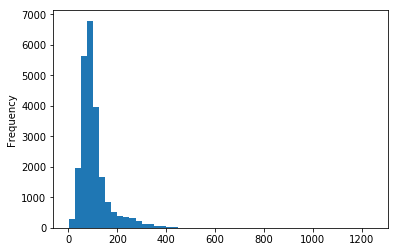

In [56]:
final_df['Vocabulary'].plot(bins=50, kind='hist')

What I find strange about the data is that some songs have a vocabulary of approximately 0 words. They must be instrumentals.